NetID: leahnl2

Assignment: Lab 2

Grade: _ / _

Comments:


# CS448 - Lab 2: Filter Design and Usage

For this lab you will learn how to design some simple filters and how to apply them to solve some common audio problems. Python’s `scipy.signal` package has an extensive set of commands to help you design filters (`firwin`, `firwin2`, `butter`, `cheby1`, `cheby2`,  `ellip`, …), so there is no shortage of options.

## Part 1: When to use what 

There will be four cases to this part, each requiring a different type of filter to address a problem in a recording.  The input recordings are:

- ```case1.wav``` [https://drive.google.com/uc?export=download&id=1eTsDiXqqLQv3murPz25O54E89i3DL__d ] : A noise-corrupted speech signal. We want to eliminate the noise.
- ```case2.wav``` [https://drive.google.com/uc?export=download&id=1egd22CxPUe6sINIi0FPTbMfG4S_In2hT ] : Same as above, different type of noise. We want to remove the noise again.
- ```case3.wav``` [https://drive.google.com/uc?export=download&id=1eF-VOVWoT1rh1wAC06WT1ANusMKyDYSn ] : Bird songs during a thunderstorm. As a world renowned ornithologist you need to have a cleaner recording of the bird songs for further analysis.
- ```case4.wav``` [https://drive.google.com/uc?export=download&id=1eeizGhrBICf6pW5OXcbq7ChF4m2N6yIk ]: The signal that we require to extract here is a Morse code which is buried in environmental noise. Design a filter to bring out the beeps.

For each case do the following:
- Plot the spectrogram of the given sound and identify the problem
- Describe what kind of filter will address this problem and why
- Design an FIR filter using ```scipy.signal.firwin()``` and/or ```scipy.signal.firwin2()```
- Design an FIR filter using the formulas in my slides (i.e. do not use ```scipy.signal```)
- Design an IIR Butterworth filter using ```scipy.signal```'s routines
- Show a plot comparing the response of all the filters (hint: ```scipy.signal.freqz```)
- Plot spectrograms of the filtered recordings and compare with the input to show that it fixed the problem
- Play the filtered sounds so that we can hear how well it works

Make some observations on how the results differ between an FIR and IIR filter and try to find the best possible filter size/type/parameters to produce the best result. Show results under various parameters (e.g. filter length) and make some plots that demonstrate the effects of these parameters. Most importantly, try to get a sense of how these design choices impact audible quality. Being able to listen at a sound and identify what’s wrong and how to fix it is a big part of audio processing.

Hint: To apply an FIR filter you can use ```scipy.signal.convolve```, to apply an IIR filter (or an FIR) you can use ```scipy.signal.lfilter```.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import utils

dft_size = 256
hop_size = dft_size // 4
hann_window = np.hanning(dft_size)

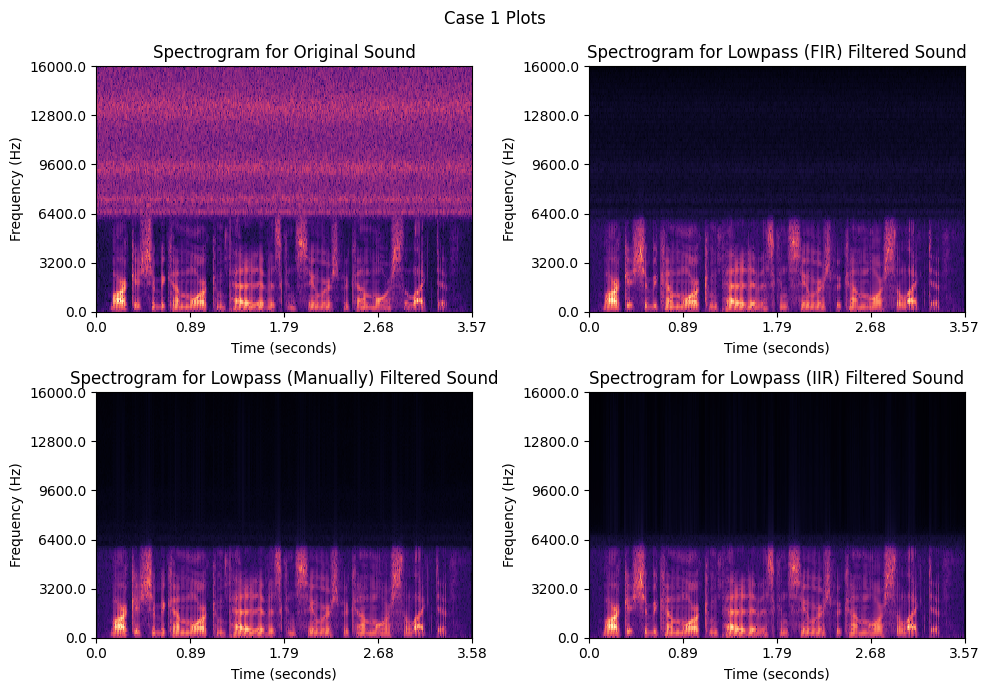

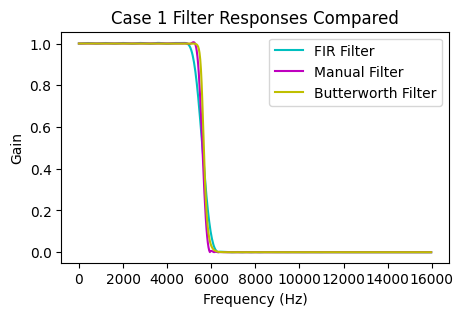

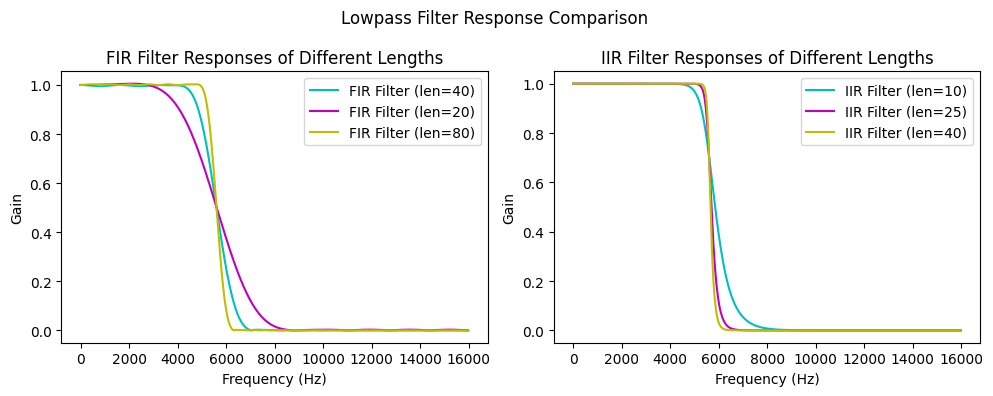

In [47]:
plt.figure(figsize=(10, 7))
plt.suptitle("Case 1 Plots")

#####################################################
# Load the sound, play it, and plot it's spectrogram
# YOUR CODE HERE
#####################################################

case1_sr, case1_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1eTsDiXqqLQv3murPz25O54E89i3DL__d")
case1_spectrogram = utils.stft(case1_x, dft_size, hop_size, hann_window)

utils.sound(case1_x, case1_sr, label="Case 1 (Original)")
plt.subplot(2, 2, 1)
utils.plot_spectrogram(case1_spectrogram, dft_size, hop_size, case1_sr, "Original", "magma")
# Observed problem: there's a lot of high frequency (> 64000 Hz) noise in the sound -> use low pass filter

####################################
# Design a filter that fixes things
# YOUR CODE HERE
####################################

# FIR filter using scipy
firfilter_case1 = scipy.signal.firwin(80, cutoff=0.35, window="hamming")
filtered1_case1 = scipy.signal.convolve(case1_x, firfilter_case1)
filtered1_case1_spectrogram = utils.stft(filtered1_case1, dft_size, hop_size, hann_window)

# FIR filter manually
omega_case1 = 0.35
n_case1 = 80
window_case1 = np.hanning(n_case1 * 2 + 1)

n_arr_case1 = np.arange(start=(-1 * n_case1), stop=(n_case1 + 1))
manualfilter_case1 = omega_case1 * np.sinc(omega_case1 * n_arr_case1)
manualfilter_case1 = window_case1 * manualfilter_case1
filtered2_case1 = scipy.signal.convolve(case1_x, manualfilter_case1)
filtered2_case1_spectrogram = utils.stft(filtered2_case1, dft_size, hop_size, hann_window)

# IIR Butterworth filter using scipy
butterfilter_case1 = scipy.signal.butter(40, 0.35, btype='lowpass', output='sos')
filtered3_case1 = scipy.signal.sosfilt(butterfilter_case1, case1_x)
filtered3_case1_spectrogram = utils.stft(filtered3_case1, dft_size, hop_size, hann_window)

###############################################
# Show me the resulting spectrograms and sounds
# YOUR CODE HERE
###############################################

# play each of the sounds
utils.sound(filtered1_case1, case1_sr, label="Case 1 (Filtered with FIR)")
utils.sound(filtered2_case1, case1_sr, label="Case 1 (Filtered manually)")
utils.sound(filtered3_case1, case1_sr, label="Case 1 (Filtered with IIR)")

# plot the spectrograms
plt.subplot(2, 2, 2)
utils.plot_spectrogram(filtered1_case1_spectrogram, dft_size, hop_size, case1_sr, "Lowpass (FIR) Filtered", "magma")

plt.subplot(2, 2, 3)
utils.plot_spectrogram(filtered2_case1_spectrogram, dft_size, hop_size, case1_sr, "Lowpass (Manually) Filtered", "magma")

plt.subplot(2, 2, 4)
utils.plot_spectrogram(filtered3_case1_spectrogram, dft_size, hop_size, case1_sr, "Lowpass (IIR) Filtered", "magma")

plt.tight_layout()
plt.show()

# plot comparison of filter responses
w1_case1, h1_case1 = scipy.signal.freqz(firfilter_case1, fs=case1_sr)
w2_case1, h2_case1 = scipy.signal.freqz(manualfilter_case1, fs=case1_sr)
w3_case1, h3_case1 = scipy.signal.sosfreqz(butterfilter_case1, fs=case1_sr)

plt.figure(figsize=(5, 3))
plt.plot(w1_case1, np.abs(h1_case1), color="c", label="FIR Filter")
plt.plot(w2_case1, np.abs(h2_case1), color="m", label="Manual Filter")
plt.plot(w3_case1, np.abs(h3_case1), color="y", label="Butterworth Filter")
plt.title("Case 1 Filter Responses Compared")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()
plt.show()

##########################################
# Compare results of different parameters
##########################################

plt.figure(figsize=(10, 4))
plt.suptitle("Lowpass Filter Response Comparison")

# compare length parameter
firfilter_compare1 = scipy.signal.firwin(40, cutoff=0.35, window="hamming")
firfilter_compare2 = scipy.signal.firwin(20, cutoff=0.35, window="hamming")
firfilter_compare3 = scipy.signal.firwin(80, cutoff=0.35, window="hamming")

w1_compare, h1_compare = scipy.signal.freqz(firfilter_compare1, fs=case1_sr)
w2_compare, h2_compare = scipy.signal.freqz(firfilter_compare2, fs=case1_sr)
w3_compare, h3_compare = scipy.signal.freqz(firfilter_compare3, fs=case1_sr)

plt.subplot(1, 2, 1)
plt.plot(w1_compare, np.abs(h1_compare), color="c", label="FIR Filter (len=40)")
plt.plot(w2_compare, np.abs(h2_compare), color="m", label="FIR Filter (len=20)")
plt.plot(w3_compare, np.abs(h3_compare), color="y", label="FIR Filter (len=80)")
plt.title("FIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

# compare length parameter
butterfilter_compare4 = scipy.signal.butter(10, 0.35, btype='lowpass', output='sos')
butterfilter_compare5 = scipy.signal.butter(25, 0.35, btype='lowpass', output='sos')
butterfilter_compare6 = scipy.signal.butter(40, 0.35, btype='lowpass', output='sos')

w4_compare, h4_compare = scipy.signal.sosfreqz(butterfilter_compare4, fs=case1_sr)
w5_compare, h5_compare = scipy.signal.sosfreqz(butterfilter_compare5, fs=case1_sr)
w6_compare, h6_compare = scipy.signal.sosfreqz(butterfilter_compare6, fs=case1_sr)

plt.subplot(1, 2, 2)
plt.plot(w4_compare, np.abs(h4_compare), color="c", label="IIR Filter (len=10)")
plt.plot(w5_compare, np.abs(h5_compare), color="m", label="IIR Filter (len=25)")
plt.plot(w6_compare, np.abs(h6_compare), color="y", label="IIR Filter (len=40)")
plt.title("IIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

plt.tight_layout()
plt.show()

# Observations: For both FIR and IIR filters, larger filter lengths result in steeper transition bands between the passband and stopband. 
# I wanted my filter to have a steeper transition since there is a prominent line between the high frequency noise and desired frequencies (as 
# seen in the spectrogram for the original sound)

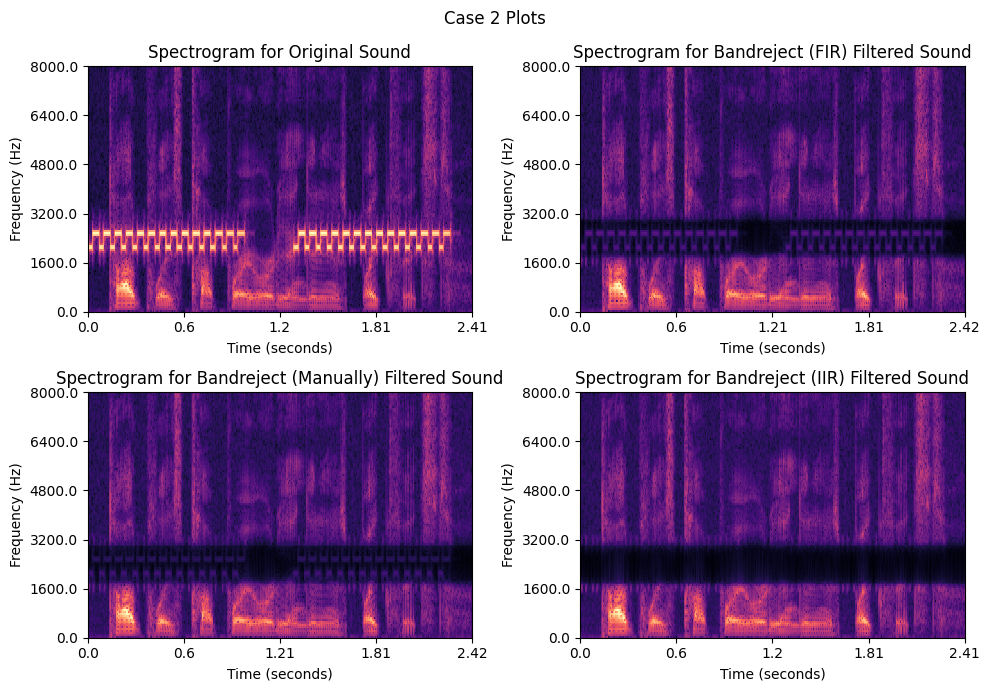

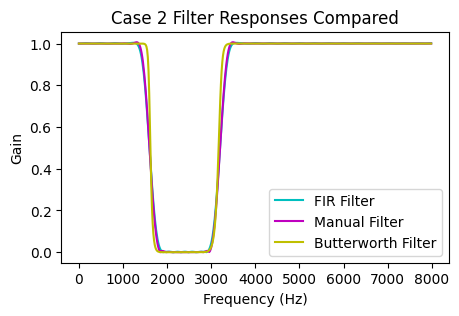

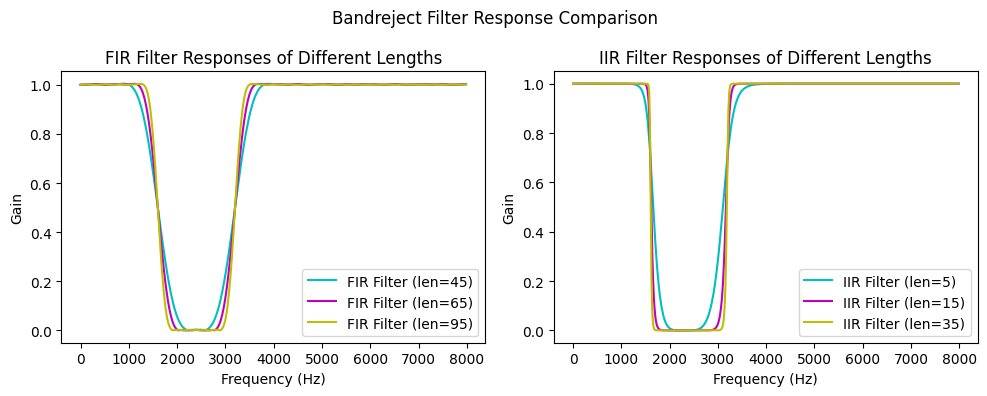

In [48]:
plt.figure(figsize=(10, 7))
plt.suptitle("Case 2 Plots")

#####################################################
# Load the sound, play it, and plot it's spectrogram
# YOUR CODE HERE
#####################################################

case2_sr, case2_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1egd22CxPUe6sINIi0FPTbMfG4S_In2hT")
case2_spectrogram = utils.stft(case2_x, dft_size, hop_size, hann_window)

utils.sound(case2_x, case2_sr, label="Case 2 (Original)")
plt.subplot(2, 2, 1)
utils.plot_spectrogram(case2_spectrogram, dft_size, hop_size, case2_sr, "Original", "magma")
# Observed problem: there is a telephone ringing sound in the background (frequencies between about 1600 and 3200 Hz) -> use bandreject filter 

####################################
# Design a filter that fixes things
# YOUR CODE HERE
####################################

# FIR filter using scipy
firfilter_case2 = scipy.signal.firwin(95, cutoff=[0.2, 0.4], window="hamming", pass_zero="bandstop")
filtered1_case2 = scipy.signal.convolve(case2_x, firfilter_case2)
filtered1_case2_spectrogram = utils.stft(filtered1_case2, dft_size, hop_size, hann_window)

# FIR filter manually
omega_r_case2 = 0.4
omega_l_case2 = 0.2
n_case2 = 55
window_case2 = np.hanning(n_case2 * 2 + 1)

n_arr_case2 = np.arange(start=(-1 * n_case2), stop=(n_case2 + 1))
manualfilter_case2 = (omega_r_case2 * np.sinc(omega_r_case2 * n_arr_case2)) - (omega_l_case2 * np.sinc(omega_l_case2 * n_arr_case2))
manualfilter_case2 = (np.where(n_arr_case2 == 0, 1, 0)) - manualfilter_case2
manualfilter_case2 = window_case2 * manualfilter_case2
filtered2_case2 = scipy.signal.convolve(case2_x, manualfilter_case2)
filtered2_case2_spectrogram = utils.stft(filtered2_case2, dft_size, hop_size, hann_window)

# IIR Butterworth filter using scipy
butterfilter_case2 = scipy.signal.butter(15, [0.2, 0.4], btype='bandstop', output='sos')
filtered3_case2 = scipy.signal.sosfilt(butterfilter_case2, case2_x)
filtered3_case2_spectrogram = utils.stft(filtered3_case2, dft_size, hop_size, hann_window)

##############################################
# Show me the resulting spectrogram and sound
# YOUR CODE HERE
##############################################

# play each of the sounds
utils.sound(filtered1_case2, case2_sr, label="Case 2 (Filtered with FIR)")
utils.sound(filtered2_case2, case2_sr, label="Case 2 (Filtered manually)")
utils.sound(filtered3_case2, case2_sr, label="Case 2 (Filtered with IIR)")

# plot the spectrograms
plt.subplot(2, 2, 2)
utils.plot_spectrogram(filtered1_case2_spectrogram, dft_size, hop_size, case2_sr, "Bandreject (FIR) Filtered", "magma")

plt.subplot(2, 2, 3)
utils.plot_spectrogram(filtered2_case2_spectrogram, dft_size, hop_size, case2_sr, "Bandreject (Manually) Filtered", "magma")

plt.subplot(2, 2, 4)
utils.plot_spectrogram(filtered3_case2_spectrogram, dft_size, hop_size, case2_sr, "Bandreject (IIR) Filtered", "magma")

plt.tight_layout()
plt.show()

# plot comparison of filter responses
w1_case2, h1_case2 = scipy.signal.freqz(firfilter_case2, fs=case2_sr)
w2_case2, h2_case2 = scipy.signal.freqz(manualfilter_case2, fs=case2_sr)
w3_case2, h3_case2 = scipy.signal.sosfreqz(butterfilter_case2, fs=case2_sr)

plt.figure(figsize=(5, 3))
plt.plot(w1_case2, np.abs(h1_case2), color="c", label="FIR Filter")
plt.plot(w2_case2, np.abs(h2_case2), color="m", label="Manual Filter")
plt.plot(w3_case2, np.abs(h3_case2), color="y", label="Butterworth Filter")
plt.title("Case 2 Filter Responses Compared")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()
plt.show()

##########################################
# Compare results of different parameters
##########################################

plt.figure(figsize=(10, 4))
plt.suptitle("Bandreject Filter Response Comparison")

# compare length parameter
firfilter_compare1 = scipy.signal.firwin(45, cutoff=[0.2, 0.4], window="hamming", pass_zero="bandstop")
firfilter_compare2 = scipy.signal.firwin(65, cutoff=[0.2, 0.4], window="hamming", pass_zero="bandstop")
firfilter_compare3 = scipy.signal.firwin(95, cutoff=[0.2, 0.4], window="hamming", pass_zero="bandstop")

w1_compare, h1_compare = scipy.signal.freqz(firfilter_compare1, fs=case2_sr)
w2_compare, h2_compare = scipy.signal.freqz(firfilter_compare2, fs=case2_sr)
w3_compare, h3_compare = scipy.signal.freqz(firfilter_compare3, fs=case2_sr)

plt.subplot(1, 2, 1)
plt.plot(w1_compare, np.abs(h1_compare), color="c", label="FIR Filter (len=45)")
plt.plot(w2_compare, np.abs(h2_compare), color="m", label="FIR Filter (len=65)")
plt.plot(w3_compare, np.abs(h3_compare), color="y", label="FIR Filter (len=95)")
plt.title("FIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

# compare length parameter
butterfilter_compare4 = scipy.signal.butter(5, [0.2, 0.4], btype='bandstop', output='sos')
butterfilter_compare5 = scipy.signal.butter(15, [0.2, 0.4], btype='bandstop', output='sos')
butterfilter_compare6 = scipy.signal.butter(35, [0.2, 0.4], btype='bandstop', output='sos')

w4_compare, h4_compare = scipy.signal.sosfreqz(butterfilter_compare4, fs=case2_sr)
w5_compare, h5_compare = scipy.signal.sosfreqz(butterfilter_compare5, fs=case2_sr)
w6_compare, h6_compare = scipy.signal.sosfreqz(butterfilter_compare6, fs=case2_sr)

plt.subplot(1, 2, 2)
plt.plot(w4_compare, np.abs(h4_compare), color="c", label="IIR Filter (len=5)")
plt.plot(w5_compare, np.abs(h5_compare), color="m", label="IIR Filter (len=15)")
plt.plot(w6_compare, np.abs(h6_compare), color="y", label="IIR Filter (len=35)")
plt.title("IIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

plt.tight_layout()
plt.show()

# Observations: For both FIR and IIR filters, as the filter length increases so does the steepness of the transition bands on both the
# lower frequency and higher frequency sides of the bandwidth. This results in a more flat "hump" where the excluded frequencies are. I chose
# a bandwidth that would remove unwanted frequencies, and I also chose a higher filter length so that there would be a sharper exclusion of 
# the telephone ringing noise.  

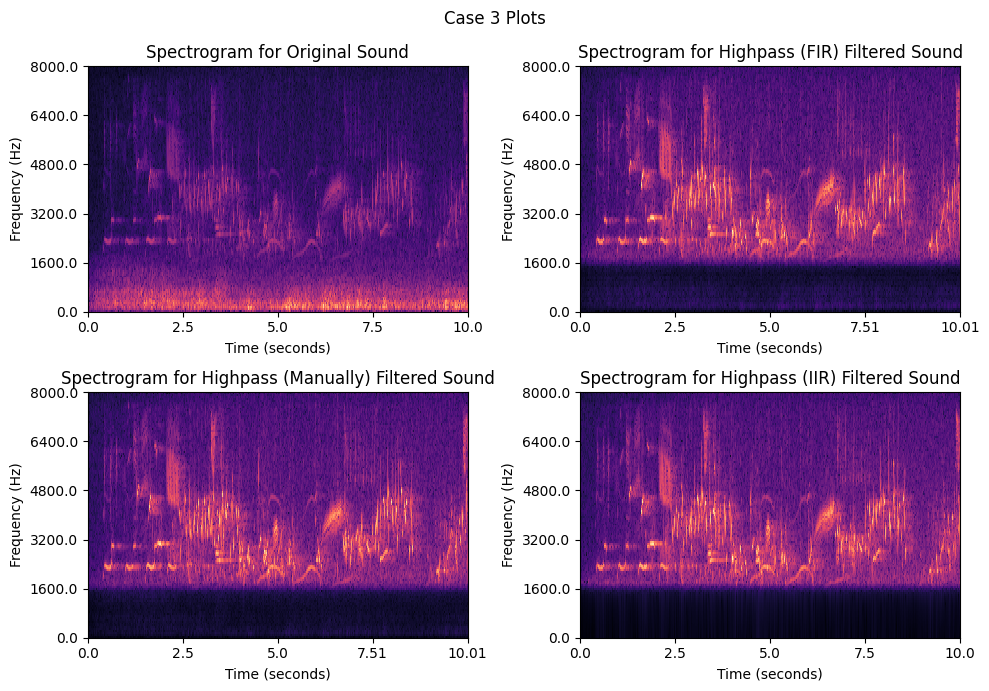

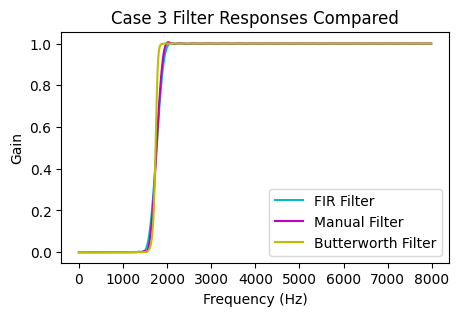

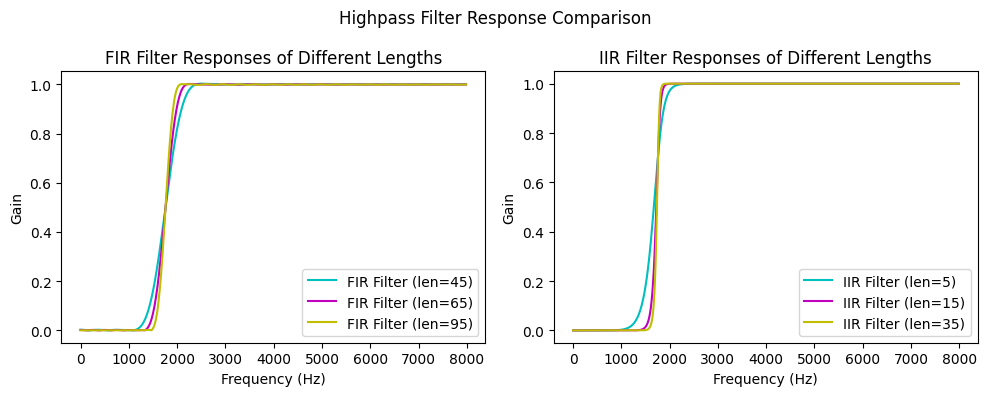

In [49]:
plt.figure(figsize=(10, 7))
plt.suptitle("Case 3 Plots")

dft_size = 256
hop_size = dft_size // 4
hann_window = np.hanning(dft_size)

#####################################################
# Load the sound, play it, and plot it's spectrogram
# YOUR CODE HERE
#####################################################

case3_sr, case3_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1eF-VOVWoT1rh1wAC06WT1ANusMKyDYSn")
case3_spectrogram = utils.stft(case3_x, dft_size, hop_size, hann_window)

utils.sound(case3_x, case3_sr, label="Case 3 (Original)")
plt.subplot(2, 2, 1)
utils.plot_spectrogram(case3_spectrogram, dft_size, hop_size, case3_sr, "Original", "magma")
# Observed problem: There's a lot of low frequency (< 1600Hz) wind sound that makes the bird chirps hard to hear -> use high pass filter

####################################
# Design a filter that fixes things
# YOUR CODE HERE
####################################

# FIR filter using scipy
firfilter_case3 = scipy.signal.firwin(95, cutoff=0.22, window="hamming", pass_zero=False)
filtered1_case3 = scipy.signal.convolve(case3_x, firfilter_case3)
filtered1_case3_spectrogram = utils.stft(filtered1_case3, dft_size, hop_size, hann_window)

# FIR filter manually
omega_case3 = 0.22
n_case3 = 60
window_case3 = np.hanning(n_case3 * 2 + 1)

n_arr_case3 = np.arange(start=(-1 * n_case3), stop=(n_case3 + 1))
manualfilter_case3 = (np.where(n_arr_case3 == 0, 1, 0)) - (omega_case3 * np.sinc(omega_case3 * n_arr_case3))
manualfilter_case3 = window_case3 * manualfilter_case3
filtered2_case3 = scipy.signal.convolve(case3_x, manualfilter_case3)
filtered2_case3_spectrogram = utils.stft(filtered2_case3, dft_size, hop_size, hann_window)

# IIR Butterworth filter using scipy
butterfilter_case3 = scipy.signal.butter(40, 0.22, btype='highpass', output='sos')
filtered3_case3 = scipy.signal.sosfilt(butterfilter_case3, case3_x)
filtered3_case3_spectrogram = utils.stft(filtered3_case3, dft_size, hop_size, hann_window)

##############################################
# Show me the resulting spectrogram and sound
# YOUR CODE HERE
##############################################

# play each of the sounds
utils.sound(filtered1_case3, case3_sr, label="Case 3 (Filtered with FIR)")
utils.sound(filtered2_case3, case3_sr, label="Case 3 (Filtered manually)")
utils.sound(filtered3_case3, case3_sr, label="Case 3 (Filtered with IIR)")

# plot the spectrograms
plt.subplot(2, 2, 2)
utils.plot_spectrogram(filtered1_case3_spectrogram, dft_size, hop_size, case3_sr, "Highpass (FIR) Filtered", "magma")

plt.subplot(2, 2, 3)
utils.plot_spectrogram(filtered2_case3_spectrogram, dft_size, hop_size, case3_sr, "Highpass (Manually) Filtered", "magma")

plt.subplot(2, 2, 4)
utils.plot_spectrogram(filtered3_case3_spectrogram, dft_size, hop_size, case3_sr, "Highpass (IIR) Filtered", "magma")

plt.tight_layout()
plt.show()

# plot comparison of filter responses
w1_case3, h1_case3 = scipy.signal.freqz(firfilter_case3, fs=case3_sr)
w2_case3, h2_case3 = scipy.signal.freqz(manualfilter_case3, fs=case3_sr)
w3_case3, h3_case3 = scipy.signal.sosfreqz(butterfilter_case3, fs=case3_sr)

plt.figure(figsize=(5, 3))
plt.plot(w1_case3, np.abs(h1_case3), color="c", label="FIR Filter")
plt.plot(w2_case3, np.abs(h2_case3), color="m", label="Manual Filter")
plt.plot(w3_case3, np.abs(h3_case3), color="y", label="Butterworth Filter")
plt.title("Case 3 Filter Responses Compared")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()
plt.show()

##########################################
# Compare results of different parameters
##########################################

plt.figure(figsize=(10, 4))
plt.suptitle("Highpass Filter Response Comparison")

# compare length parameter
firfilter_compare1 = scipy.signal.firwin(45, cutoff=0.22, window="hamming", pass_zero=False)
firfilter_compare2 = scipy.signal.firwin(65, cutoff=0.22, window="hamming", pass_zero=False)
firfilter_compare3 = scipy.signal.firwin(95, cutoff=0.22, window="hamming", pass_zero=False)

w1_compare, h1_compare = scipy.signal.freqz(firfilter_compare1, fs=case3_sr)
w2_compare, h2_compare = scipy.signal.freqz(firfilter_compare2, fs=case3_sr)
w3_compare, h3_compare = scipy.signal.freqz(firfilter_compare3, fs=case3_sr)

plt.subplot(1, 2, 1)
plt.plot(w1_compare, np.abs(h1_compare), color="c", label="FIR Filter (len=45)")
plt.plot(w2_compare, np.abs(h2_compare), color="m", label="FIR Filter (len=65)")
plt.plot(w3_compare, np.abs(h3_compare), color="y", label="FIR Filter (len=95)")
plt.title("FIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

# compare length parameter
butterfilter_compare4 = scipy.signal.butter(10, 0.22, btype='highpass', output='sos')
butterfilter_compare5 = scipy.signal.butter(25, 0.22, btype='highpass', output='sos')
butterfilter_compare6 = scipy.signal.butter(40, 0.22, btype='highpass', output='sos')

w4_compare, h4_compare = scipy.signal.sosfreqz(butterfilter_compare4, fs=case3_sr)
w5_compare, h5_compare = scipy.signal.sosfreqz(butterfilter_compare5, fs=case3_sr)
w6_compare, h6_compare = scipy.signal.sosfreqz(butterfilter_compare6, fs=case3_sr)

plt.subplot(1, 2, 2)
plt.plot(w4_compare, np.abs(h4_compare), color="c", label="IIR Filter (len=5)")
plt.plot(w5_compare, np.abs(h5_compare), color="m", label="IIR Filter (len=15)")
plt.plot(w6_compare, np.abs(h6_compare), color="y", label="IIR Filter (len=35)")
plt.title("IIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

plt.tight_layout()
plt.show()

# Observations: Similar to the lowpass filter responses, a larger filter length results in a more steep transition band for the highpass filter.
# Once again, I chose to have a larger filter length since most of the noise occurred below 1600Hz and there wasn't really any loss of the bird
# noises by doing this.

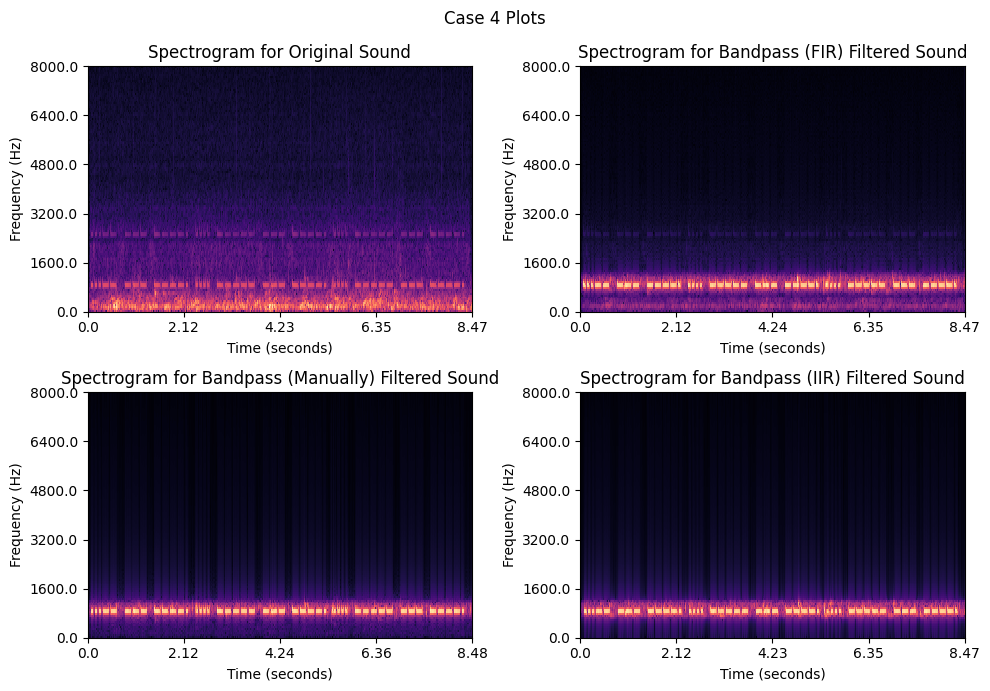

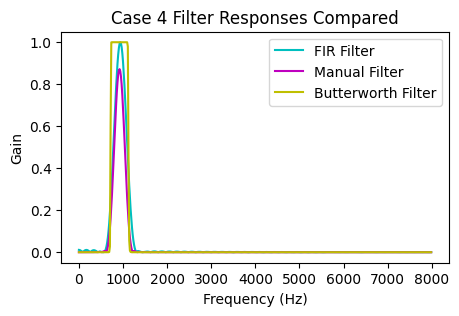

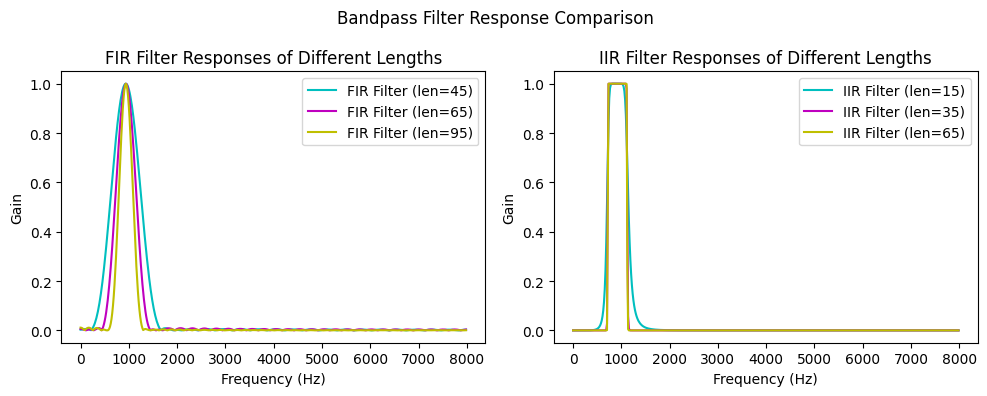

In [50]:
plt.figure(figsize=(10, 7))
plt.suptitle("Case 4 Plots")

#####################################################
# Load the sound, play it, and plot it's spectrogram
# YOUR CODE HERE
#####################################################

case4_sr, case4_x = utils.wavreadurl("https://drive.google.com/uc?export=download&id=1eeizGhrBICf6pW5OXcbq7ChF4m2N6yIk")
case4_spectrogram = utils.stft(case4_x, dft_size, hop_size, hann_window)

utils.sound(case4_x, case4_sr, label="Case 4 (Original)")
plt.subplot(2, 2, 1)
utils.plot_spectrogram(case4_spectrogram, dft_size, hop_size, case4_sr, "Original", "magma")
# Observed problem: there is low frequency noise that makes it hard to hear the morse code -> use bandpass filter for the beep sounds 

####################################
# Design a filter that fixes things
# YOUR CODE HERE
####################################

# FIR filter using scipy
firfilter_case4 = scipy.signal.firwin(95, cutoff=[0.11, 0.125], pass_zero="bandpass", window="hamming")
filtered1_case4 = scipy.signal.convolve(case4_x, firfilter_case4)
filtered1_case4_spectrogram = utils.stft(filtered1_case4, dft_size, hop_size, hann_window)

# FIR filter manually
omega_r_case4 = 0.13
omega_l_case4 = 0.10
n_case4 = 75
window_case4 = np.hanning(n_case4 * 2 + 1)

n_arr_case4 = np.arange(start=(-1 * n_case4), stop=(n_case4 + 1))
manualfilter_case4 = (omega_r_case4 * np.sinc(omega_r_case4 * n_arr_case4)) - (omega_l_case4 * np.sinc(omega_l_case4 * n_arr_case4))
manualfilter_case4 = window_case4 * manualfilter_case4
filtered2_case4 = scipy.signal.convolve(case4_x, manualfilter_case4)
filtered2_case4_spectrogram = utils.stft(filtered2_case4, dft_size, hop_size, hann_window)

# IIR Butterworth filter using scipy
butterfilter_case4 = scipy.signal.butter(35, [0.09, 0.14], btype='bandpass', output='sos')
filtered3_case4 = scipy.signal.sosfilt(butterfilter_case4, case4_x)
filtered3_case4_spectrogram = utils.stft(filtered3_case4, dft_size, hop_size, hann_window)

##############################################
# Show me the resulting spectrogram and sound
# YOUR CODE HERE
##############################################

# play each of the sounds
utils.sound(filtered1_case4, case4_sr, label="Case 4 (Filtered with FIR)")
utils.sound(filtered2_case4, case4_sr, label="Case 4 (Filtered manually)")
utils.sound(filtered3_case4, case4_sr, label="Case 4 (Filtered with IIR)")

# plot the spectrograms
plt.subplot(2, 2, 2)
utils.plot_spectrogram(filtered1_case4_spectrogram, dft_size, hop_size, case4_sr, "Bandpass (FIR) Filtered", "magma")

plt.subplot(2, 2, 3)
utils.plot_spectrogram(filtered2_case4_spectrogram, dft_size, hop_size, case4_sr, "Bandpass (Manually) Filtered", "magma")

plt.subplot(2, 2, 4)
utils.plot_spectrogram(filtered3_case4_spectrogram, dft_size, hop_size, case4_sr, "Bandpass (IIR) Filtered", "magma")

plt.tight_layout()
plt.show()

# plot comparison of filter responses
w1_case4, h1_case4 = scipy.signal.freqz(firfilter_case4, fs=case4_sr)
w2_case4, h2_case4 = scipy.signal.freqz(manualfilter_case4, fs=case4_sr)
w3_case4, h3_case4 = scipy.signal.sosfreqz(butterfilter_case4, fs=case4_sr)

plt.figure(figsize=(5, 3))
plt.plot(w1_case4, np.abs(h1_case4), color="c", label="FIR Filter")
plt.plot(w2_case4, np.abs(h2_case4), color="m", label="Manual Filter")
plt.plot(w3_case4, np.abs(h3_case4), color="y", label="Butterworth Filter")
plt.title("Case 4 Filter Responses Compared")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()
plt.show()

##########################################
# Compare results of different parameters
##########################################

plt.figure(figsize=(10, 4))
plt.suptitle("Bandpass Filter Response Comparison")

# compare length parameter
firfilter_compare1 = scipy.signal.firwin(45, cutoff=[0.11, 0.125], pass_zero="bandpass", window="hamming")
firfilter_compare2 = scipy.signal.firwin(65, cutoff=[0.11, 0.125], pass_zero="bandpass", window="hamming")
firfilter_compare3 = scipy.signal.firwin(95, cutoff=[0.11, 0.125], pass_zero="bandpass", window="hamming")

w1_compare, h1_compare = scipy.signal.freqz(firfilter_compare1, fs=case4_sr)
w2_compare, h2_compare = scipy.signal.freqz(firfilter_compare2, fs=case4_sr)
w3_compare, h3_compare = scipy.signal.freqz(firfilter_compare3, fs=case4_sr)

plt.subplot(1, 2, 1)
plt.plot(w1_compare, np.abs(h1_compare), color="c", label="FIR Filter (len=45)")
plt.plot(w2_compare, np.abs(h2_compare), color="m", label="FIR Filter (len=65)")
plt.plot(w3_compare, np.abs(h3_compare), color="y", label="FIR Filter (len=95)")
plt.title("FIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

# compare length parameter
butterfilter_compare4 = scipy.signal.butter(5, [0.09, 0.14], btype='bandpass', output='sos')
butterfilter_compare5 = scipy.signal.butter(35, [0.09, 0.14], btype='bandpass', output='sos')
butterfilter_compare6 = scipy.signal.butter(65, [0.09, 0.14], btype='bandpass', output='sos')

w4_compare, h4_compare = scipy.signal.sosfreqz(butterfilter_compare4, fs=case4_sr)
w5_compare, h5_compare = scipy.signal.sosfreqz(butterfilter_compare5, fs=case4_sr)
w6_compare, h6_compare = scipy.signal.sosfreqz(butterfilter_compare6, fs=case4_sr)

plt.subplot(1, 2, 2)
plt.plot(w4_compare, np.abs(h4_compare), color="c", label="IIR Filter (len=15)")
plt.plot(w5_compare, np.abs(h5_compare), color="m", label="IIR Filter (len=35)")
plt.plot(w6_compare, np.abs(h6_compare), color="y", label="IIR Filter (len=65)")
plt.title("IIR Filter Responses of Different Lengths")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()

plt.tight_layout()
plt.show()

# Observations: The FIR filter responses had steeper transition bands as the filter lengths increased. I didn't notice this trend as much with
# the IIR filters, but they did become more steep as the filter length increased. There was also quite a difference in the shapes of the responses
# between the FIR and IIR filters. The butterworth bandpass filter was more flat at its bandwidth hump than the IIR filters. I chose to have a 
# bandpass filter at the lower frequency morse code beeps since it was much more prominent than the higher frequency beeps (as shown in the first
# spectrogram). This also let me remove more of the noise in the 1400-2200Hz range. 

## Part 2. Designing a simple equalizer

For this part we will design a simple graphic equalizer. We will do so using a more straightforward approach as opposed to a bank of filters as discussed in class.

We want to make an equalizer which contains six bands with center frequencies at 100Hz, 200Hz, 400Hz, 800Hz, 1,600Hz and 3,200Hz. Your equalizer function will take two inputs, one for the input sound and a 6-element gain vector that will indicate how much to boost or suppress each frequency band. Use the ```scipy.signal.firwin2``` function to design a filter that has the desired characteristics. For various settings of the gain vector, use the ```scipy.signal.freqz``` command to plot the response of the filter and verify that it behaves as indicated. Experiment with various filter lengths and see which works best.

Once you figure that out, design a graphic equalizer with as many bands as you like (and arbitrary center frequencies as well), and use it to solve the problems in part 1 again. The only thing that should be different in the EQ for each recording should be the gains for each band. Play the output sounds, and show the spectrograms, see how they compare with your previous solutions.

Optional extra credit (+1pt): Use ipywidgets to make interactive sliders and process an audio stream and play it from the speakers in real-time (either from mic input, or just stream audio from disk).

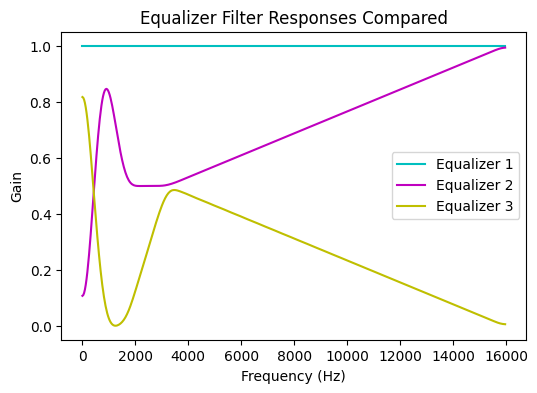

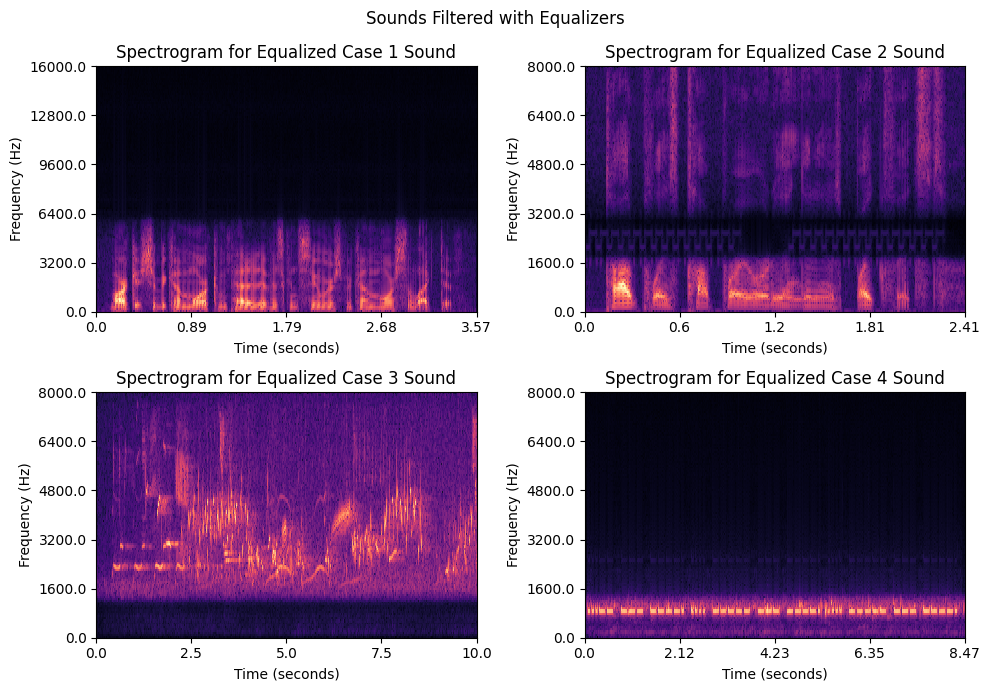

In [60]:
# Design an equalizer function
def equalizer(input_sound, gains):
    # YOUR CODE HERE
    input_wav, input_sr = input_sound
    nyquist = input_sr / 2
    normalized_freqs = np.array([0.0, 100.0, 200.0, 400.0, 800.0, 1600.0, 3200.0, nyquist]) / nyquist

    equalizer_filter = scipy.signal.firwin2(101, normalized_freqs, gains)
    filtered_sound = scipy.signal.lfilter(equalizer_filter, [1.0], input_sound[0])
    
    return equalizer_filter, filtered_sound

###############################################
# Show its response with various gain settings
# YOUR CODE HERE
###############################################
eq_filter1, test1 = equalizer((case1_x, case1_sr), [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
eq_filter2, test2 = equalizer((case1_x, case1_sr), [0.0, 0.0, 0.0, 0.5, 1.0, 0.5, 0.5, 1.0])
eq_filter3, test3 = equalizer((case1_x, case1_sr), [1.0, 1.0, 0.75, 0.5, 0.0, 0.0, 0.5, 0.0])

w1, h1 = scipy.signal.freqz(eq_filter1, fs=case1_sr)
w2, h2 = scipy.signal.freqz(eq_filter2, fs=case1_sr)
w3, h3 = scipy.signal.freqz(eq_filter3, fs=case1_sr)
    
plt.figure(figsize=(6, 4))
plt.plot(w1, np.abs(h1), color="c", label="Equalizer 1")
plt.plot(w2, np.abs(h2), color="m", label="Equalizer 2")
plt.plot(w3, np.abs(h3), color="y", label="Equalizer 3")
plt.title("Equalizer Filter Responses Compared")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.legend()
plt.show()

# Observations: Playing with the different gain settings showed me how certain center frequencies were being manipulated. I made an 
# equalizer with all of its gains set to 1 in order to compare it to other gain settings. The equalizer follows the general trend of boosting
# frequency signals with higher gains while suppressing those with lower gains.

#################################################
# Show how it can denoise the examples in part 1
# YOUR CODE HERE
#################################################

def general_equalizer(input_sound, gains):
    # YOUR CODE HERE
    input_wav, input_sr = input_sound
    freqs = [600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 3200.0, 5800.0, 6000.0]
    nyquist = input_sr / 2
    normalized_freqs = np.array([0.0] + freqs + [nyquist]) / nyquist

    equalizer_filter = scipy.signal.firwin2(101, normalized_freqs, gains)
    filtered_sound = scipy.signal.lfilter(equalizer_filter, [1.0], input_sound[0])
    
    return equalizer_filter, filtered_sound


plt.figure(figsize=(10, 7))
plt.suptitle("Sounds Filtered with Equalizers")
# case 1
eq_filter_case1, sound_case1 = general_equalizer((case1_x, case1_sr), [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0])
eq_case1_spectrogram = utils.stft(sound_case1, dft_size, hop_size, hann_window)
utils.sound(sound_case1, case1_sr, label="Case 1 (Equalized)")
plt.subplot(2, 2, 1)
utils.plot_spectrogram(eq_case1_spectrogram, dft_size, hop_size, case1_sr, "Equalized Case 1", "magma")

# case 2
eq_filter_case2, sound_case2 = general_equalizer((case2_x, case2_sr), [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0])
eq_case2_spectrogram = utils.stft(sound_case2, dft_size, hop_size, hann_window)
utils.sound(sound_case2, case2_sr, label="Case 2 (Equalized)")
plt.subplot(2, 2, 2)
utils.plot_spectrogram(eq_case2_spectrogram, dft_size, hop_size, case2_sr, "Equalized Case 2", "magma")

# case 3
eq_filter_case3, sound_case3 = general_equalizer((case3_x, case3_sr), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0])
eq_case3_spectrogram = utils.stft(sound_case3, dft_size, hop_size, hann_window)
utils.sound(sound_case3, case3_sr, label="Case 3 (Equalized)")
plt.subplot(2, 2, 3)
utils.plot_spectrogram(eq_case3_spectrogram, dft_size, hop_size, case3_sr, "Equalized Case 3", "magma")

# # case 4
eq_filter_case4, sound_case4 = general_equalizer((case4_x, case4_sr), [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
eq_case4_spectrogram = utils.stft(sound_case4, dft_size, hop_size, hann_window)
utils.sound(sound_case4, case4_sr, label="Case 4 (Equalized)")
plt.subplot(2, 2, 4)
utils.plot_spectrogram(eq_case4_spectrogram, dft_size, hop_size, case4_sr, "Equalized Case 4", "magma")

plt.tight_layout()
plt.show()

# Observations: Using the equalizer to filter out unwanted frequencies seemed to give more control over how to adjust specific frequencies.
# I was able to better target certain frequencies in order to either boost or suppress them. For case 4, it was a bit harder to get the morse 
# code sound to be filtered correctly because of the sharp cutoffs of the band of frequencies I wanted to keep. I had to add more center
# frequencies to better balance the gains in order to get the desired result. 

## Part 3: Say ow ...

Let's make the computer talk.  To do so we need two things, an *excitation signal* and a filter.  For the excitation we will use something called the "Rosenberg Pulse".  A simple version of it will be the same as a cosine, but it will only be zero between phase $0$ and $3\pi/2$.  It will effectively look like a curvy ramp from zero to one that takes place during the last quarter of each period.  Generate a 0.3 sec long Rosenberg pulse with a frequency of 100Hz, at a sampling rate of 8kHz.  It should sound like a short buzzy tone.

In [52]:
# Make the pulse
sr = 8000
duration = 0.3
freq = 100
period = 1.0 / freq

# calculate cosine
t = np.linspace(0.0, duration, int(duration * sr))
phases = (t % period) * (2 * np.pi * freq)
s = np.cos(phases, where=(phases > (3 * np.pi) / 2))

# Verify that it sounds like a buzz
utils.sound(s, rate=sr, label="Rosenberg Pulse")

Now that you have a glottal pulse as the excitation signal, let's apply some filters to generate two vowels, "a" and "u".  In the code snippet below I have two tables that hold the center frequency and amplitude of the five resonances that make each vowel.  To model these resonances, design a bandpass filter with a bandwidth of 90Hz centered at each of the given frequencies.  You will end up with five filters for each vowel.  Then take the pulse sound from above and convolve it with the five filters of each vowel (in parallel, not in series) and add the outputs together and scale them with their corresponding amplitudes in the given tables.  Play the results and verify that they sound like a robotic "a" and an "u".

To design the filters, use the ```scipy.signal.firwin``` function with filters of length 61.

In [53]:
# Formant table for "a"
Fa = [
    [600, 1040, 2250, 2450, 2750], # Formant frequencies
    [1,     .7,   .6,   .5,   .3], # Formant amplitudes
]

# Formant table for "u"
Fu = [
    [400, 600, 2400, 2675, 2950], # Formant frequencies
    [1,    .7,   .6,   .5,   .3], # Formant amplitudes
]

# Apply a sequence of filters to the pulse train and add the results
def vocalize(s, F):
	# YOUR CODE HERE
    vocals = np.zeros_like(s)
    nyquist = sr / 2
    tol = 90.0 / 2

    # loop through each formant pair and bandpass filter the input sound
    for freq, amp in zip(F[0], F[1]):
        low = (freq - tol) / nyquist
        high = (freq + tol) / nyquist

        # create bandpass filter
        bandpass_filter = scipy.signal.firwin(61, cutoff=[low, high], pass_zero="bandpass", window="hamming")
        filtered = scipy.signal.convolve(s, bandpass_filter, mode="same")
        vocals += (amp * filtered)
        
    return vocals


# Make the two utterances
s1 = vocalize( s, Fa)
s2 = vocalize( s, Fu)

# And play them
utils.sound( s1, sr, 'a')
utils.sound( s2, sr, 'u')

Now let's try to compose a word by combining the vowels.  Concatenate the two sounds above and play the result to form the word "ow".  It will not sound great because the transition from one to the other is too abrupt.  To make this a little better, we will need to crossfade the two sounds (just as you have already done for lab 0, part 3).  To do so, use a 100ms linear crossfade between the two sounds.  Play the result and verify that it sounds better.

In [54]:
# Concatenate and play the two utterances
conc_s = np.append(s1, s2)
utils.sound( conc_s, sr, 'Concatenation')


# Crossfade them instead
fade_out = np.linspace(1, 0, int(sr * 0.1))
fade_in = np.linspace(0, 1, int(sr * 0.1))
cross_s = np.concatenate((s1[0:int(sr*0.2)], fade_out * s1[int(sr*0.2):] + fade_in * s2[:int(sr*0.1)], s2[int(sr*0.1):]), axis=None)

utils.sound( cross_s, sr, 'Crossfade')

Now take a minute to feel sorry for people who source-filter speech synthesis, who had to do this bit-by-bit for entire sentences! :) 

## Part 4: A simple adaptive filter

This part is optional and extra credit for 3-hour credit, and required for 4-hour credit.

You will design an *adaptive filter* whose job will be to tune itself to cancel the right frequency band. We will once again use the voice/ring input and a band-reject filter to remove the ring.  This time however, we will not know the filter's center frequency and we will make a filter that tunes itself to remove as much noise as possible.

In [ ]:
# Load the speech/ringing sound
sr,s = wavreadurl( 'https://drive.google.com/uc?export=download&id=1egd22CxPUe6sINIi0FPTbMfG4S_In2hT')
sound( s, sr, 'Input')

This will be a somewhat constrained problem to keep things easy, but the idea itself it very general and is often applied to many audio problems.  To make things a little easier we will use Jax, which is mostly syntax-compatible with numpy.  If you are comfortable with it you are also welcome to use PyTorch. Do the following by revising your code from above:
- Write a function that applies a band-reject filter (use your own implementation from above, not scipy's) to the input signal.  The only input to that function will be the center frequency of the filter as a float between 0 and 1 (corresponding to DC and nyquist respectively). The bandwidth of the filter should be 0.1 (in normalized frequency units again).  The output of the function will be the standard deviation of the filtered signal.  If the filter center is correct, the output should be quieter since we would have removed the loud ringing.

- Complete the training loop I setup in which you need to get the gradient of the loss function (automatically, don't derive by hand).  Once you have the gradient we can subtract it from the current filter frequency estimate and get a revised value that minimizes the loss.  If we loop enough times it will converge to the right answer.  The only thing you need to do is to fill in the missing bits in the code below.

In [ ]:
# # Loss function to minimize
def loss( f):

	# Make a band-reject filter with the desired parameters
    b = 

	# Apply the filter to the input signal
    y = 

	# Return its standard deviation
    return y.std()

# Initial filter value
f = .5

# Train to adapt the filter
h = []
for ep in range( 50):
	# Get the gradient of the loss function wrt to f (see jax.grad, or torch.autograd.grad)
	g = 

	# Update the filter value
	f = f - .01 * g

# Convert final value of f to Hz and compare with your original filter above, it is close?
